# Part II- Analyzing Earning Conference Call Transcript's Sentiment

    Company's Quarterly Earning Conference Call Transcript is a document that provides a written record of the conference call between a company's management team and investors or analysts discussing the company's financial performance during a specific quarter. 
    
    The transcript typically includes the prepared remarks from the company's management team, as well as the question and answer session that follows. Investors and analysts use these transcripts to gain insights into the company's financial performance, strategic direction, and management's perspective on industry trends and challenges. 
    
    The transcripts can also be useful for journalists, academics, and other stakeholders interested in analyzing or reporting on the company's financial performance.

_____

<b>Company: Netflix Inc (NFLX)
<br>
Review Year: 2020
<br>
Reference Link:
</b><b>
    

<a href="https://www.fool.com/earnings/call-transcripts/2020/04/21/netflix-inc-nflx-q1-2020-earnings-call-transcript.aspx">Netflix Q1 2020</a>

<a href="https://www.fool.com/earnings/call-transcripts/2020/07/18/netflix-nflx-q2-2020-earnings-call-transcript.aspx">Netflix Q2 2020</a>

<a href="https://www.fool.com/earnings/call-transcripts/2020/10/21/netflix-nflx-q3-2020-earnings-call-transcript/">Netflix Q3 2020</a>

<a href="https://www.fool.com/earnings/call-transcripts/2021/01/20/netflix-nflx-q4-2020-earnings-call-transcript/">Netflix Q4 2020</a>

    
    

<b> You all can download your desired company Quaterly Call transcript from above link and replace the call .txt files 
& its part participants to do your own analysis

In [8]:
#Importing relevent Libraries:

import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from textblob import TextBlob

#### Task 1: Transcript Collection

In [9]:
# Step 1: Loading Text Files

# open the canference call 1 file in read mode
with open('Netflix (NFLX) Q1 2020 Earnings Call Transcript.txt', 'r') as file:
    call1 = file.read()

# open the canference call 2 file in read mode
with open('Netflix (NFLX) Q2 2020 Earnings Call Transcript.txt', 'r') as file:
    call2 = file.read()
    
    # open the canference call 3 file in read mode
with open('Netflix (NFLX) Q3 2020 Earnings Call Transcript.txt', 'r') as file:
    call3 = file.read()
    
    # open the canference call 4 file in read mode
with open('Netflix (NFLX) Q4 2020 Earnings Call Transcript.txt', 'r') as file:
    call4 = file.read()

In [10]:
# Step2: Text Preprocessing

# call1
participantsCall1 = [ 
    'Spencer Wang -- Vice President of Finance And Investor Relation',
    'Reed Hastings -- Founder, Chief Executive Officer',
    'Greg Peters -- Chief Product Officer',
    'Ted Sarandos -- Chief Content Officer',
    'Spencer Neumann -- Chief Financial Officer',
   ' Michael C. Morris -- Guggenheim Securities -- Analyst'
    ]

# removing participants from call 1
for participant in participantsCall1:
    call1 = call1.replace(participant, "")
    
    # call 2
participantsCall2 = [ 
    'Spencer Wang -- Vice President of Finance And Investor Relation',
    'Kannan Venkateshwar -- Barclays Capital -- Analyst',
    'Ted Sarandos -- Chief Content Officer',
    'Greg Peters -- Chief Product Officer',
    'Reed Hastings -- Founder, Chief Executive Officer',
    'Spencer Neumann -- Chief Financial Officer'
    
    ]

# removing participants from call 1
for participant in participantsCall2:
    call2 = call2.replace(participant, "")
    
    # call 3
participantsCall3= [ 
    'Spencer Wang -- Vice President of Finance And Investor Relation',
    'Kannan Venkateshwar -- Barclays Capital -- Analyst',
    'Wilmot Hastings -- Chief Executive Officer',
    'Greg Peters -- Chief Product Officer',
    'Reed Hastings -- Founder, Chief Executive Officer',
    'Ted Sarandos -- Chief Content Officer',
    'Spencer Neumann -- Chief Financial Officer'
    ]

# removing participants from call 1
for participant in participantsCall3:
    call3 = call3.replace(participant, "")
    
    
    # call 4
participantsCall4 = [ 
    'Spencer Wang -- Vice President of Finance And Investor Relation',
    'Kannan Venkateshwar -- Barclays Capital -- Analyst',
    'Spencer Neumann -- Chief Financial Officer',
    'Reed Hastings -- Founder, Chief Executive Officer',
    'Ted Sarandos -- Chief Content Officer',
    'Greg Peters -- Chief Product Officer'
    ]

# removing participants from call 1
for participant in participantsCall4:
    call4 = call4.replace(participant, "")

    # concatenate the four calls together
calls = call1 + call2 + call3 + call4
print('Total Char-Lenght:',len(calls))

Total Char-Lenght: 168043


In [11]:
# Step 3: Tokenization

# Load the large English NLP model
nlp = spacy.load("en_core_web_sm")

# Process the text using spaCy NLP
doc = nlp(calls)

#### Task 2: N-gram Analysis

#### Method 1

In [12]:
word_frequencies = {}

for token in doc:
  # Only process words that are not stop words, punctuation, or whitespace
  if not token.is_stop and not token.is_punct and not token.is_space:
      # If the word is already in the word_frequencies dictionary, increase its count
      if token.text in word_frequencies:
          word_frequencies[token.text] += 1
      # Otherwise, add the word to the dictionary with a count of 1
      else:
          word_frequencies[token.text] = 1


In [13]:
# Step 4: Filtering and Sorting

# Use the dictionary to craete a Pandas dataframe
df = pd.DataFrame(list(word_frequencies.items()), columns = ['Word', 'Frequency'])

#sort by frequency 
df = df.sort_values(by='Frequency', ascending=False)

# filter words with frequency more than equal to 25
df = df.query("Frequency >= 25")

df.head()

,Word,Frequency
149,think,278
26,Officer,168
24,Chief,168
69,like,110
308,year,107


#### Method 2

    Importing nltk library to use pre-defined ngrams function

In [20]:
# 2-grams (bigrams)

from collections import Counter
from nltk.util import ngrams

# Get all the words from the tweets
words = []
for w in df['Word']:
    words += w.split()

# Define the N-gram range
ngram_range = (2, 2)  # 2-grams (bigrams)

# Create the N-grams
ngrams_list = ngrams(words, n=ngram_range[0])

# Count the frequency of each N-gram
ngrams_freq = Counter(ngrams_list)

# Sort the N-grams by frequency
ngrams_sorted = sorted(ngrams_freq.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most common N-grams
print(f"Top {ngram_range[0]}-grams by frequency:")
for ngram, freq in ngrams_sorted[:10]:
    print(f"{ngram}: {freq}")

Top 2-grams by frequency:
('think', 'Officer'): 1
('Officer', 'Chief'): 1
('Chief', 'like'): 1
('like', 'year'): 1
('year', 'content'): 1
('content', 'going'): 1
('going', 'Netflix'): 1
('Netflix', 'Kannan'): 1
('Kannan', 'world'): 1
('world', 'kind'): 1


In [24]:
# 3-grams (trigrams)

ngram_range = (3, 3)  # 3-grams (trigrams)

# Create the N-grams
ngrams_list = ngrams(words, n=ngram_range[0])

# Count the frequency of each N-gram
ngrams_freq = Counter(ngrams_list)

# Sort the N-grams by frequency
ngrams_sorted = sorted(ngrams_freq.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most common N-grams
print(f"Top {ngram_range[0]}-grams by frequency:")
for ngram, freq in ngrams_sorted[:10]:
    print(f"{ngram}: {freq}")

Top 3-grams by frequency:
('think', 'Officer', 'Chief'): 1
('Officer', 'Chief', 'like'): 1
('Chief', 'like', 'year'): 1
('like', 'year', 'content'): 1
('year', 'content', 'going'): 1
('content', 'going', 'Netflix'): 1
('going', 'Netflix', 'Kannan'): 1
('Netflix', 'Kannan', 'world'): 1
('Kannan', 'world', 'kind'): 1
('world', 'kind', 'great'): 1


#### Ngram Visualisation

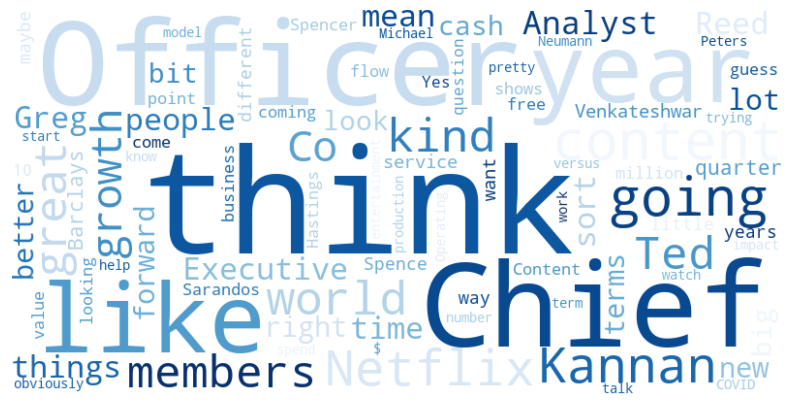

In [14]:
word_dict = dict(zip(df['Word'], df['Frequency']))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues',
                      max_font_size=150, min_font_size=10).generate_from_frequencies(word_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

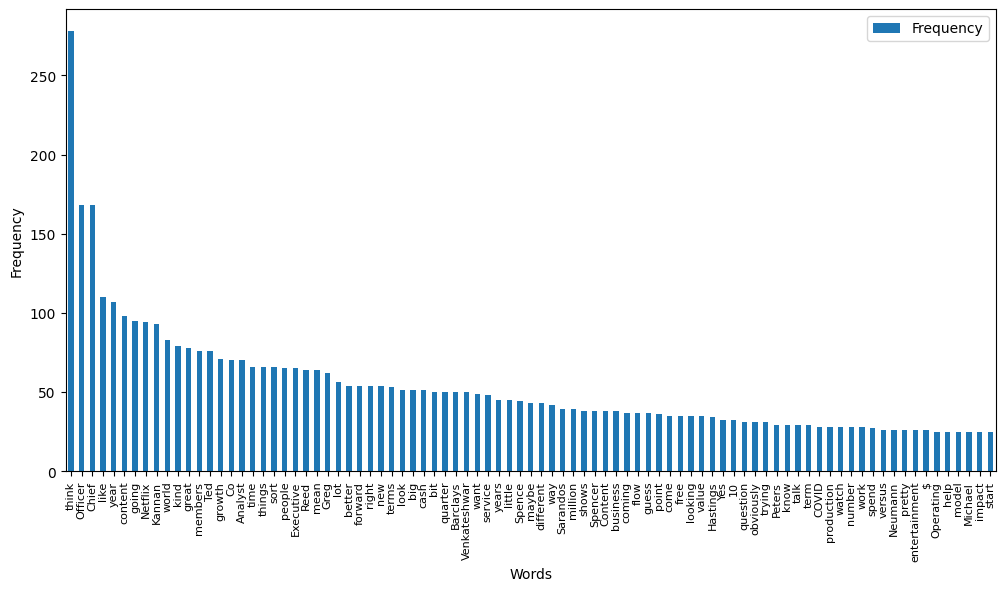

In [15]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
df.plot(kind='bar', x='Word', y='Frequency', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')

# Set the font size of the x-axis labels
plt.xticks(fontsize=8)

# Show the plot
plt.show()


    Insights: Top frequent words are Think, Officer, Chief, Like, Year, Content etc

#### Task 3: Sentiment Analysis

In [16]:
# Tokenization
nltk.download('punkt')
sentences = nltk.sent_tokenize(calls)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulkashyap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Polarity Score
    
    Polarity refers to the degree of positivity, negativity, or neutrality of a text. It is measured on a scale ranging from -1 to 1, where -1 indicates very negative sentiment, 0 indicates neutral sentiment, and 1 indicates very positive sentiment. For example, the polarity of a sentence like "I love this product" would be close to 1, while the polarity of a sentence like "I hate this product" would be close to -1.

In [17]:
# Polarity Score

polarity_scores = []

for sentence in sentences:
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    polarity_scores.append(polarity)

print("Average polarity score:", np.mean(polarity_scores))

Average polarity score: 0.17775632871593247


    Polarity Score of .17 which is slightly positive, indicating that the sentiment towards Netflix is generally positive.

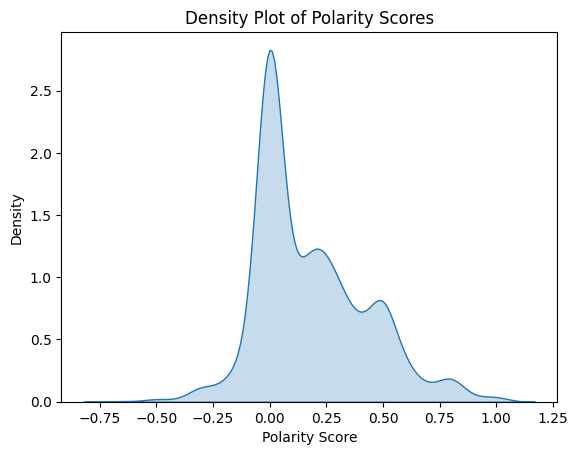

In [20]:
import seaborn as sns

sns.kdeplot(polarity_scores, fill=True)
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.title('Density Plot of Polarity Scores')
plt.show()

    The density plot following a slight normal distribution indicates that the majority of the polarity scores  are centered around the mean (0.177) and there are relatively fewer extreme positive or negative scores

____

#### Subjective Score
    Subjectivity refers to the degree of personal feelings, emotions, or opinions reflected in a text. It is measured on a scale ranging from 0 to 1, where 0 indicates that a text is very objective and based purely on facts, and 1 indicates that a text is very subjective and based purely on personal opinions. For example, a news article reporting on a political event might have a low subjectivity score, while a personal blog post expressing opinions about the same event might have a higher subjectivity score.

In [31]:
subjectivity_scores = []

for sentence in sentences:
    blob = TextBlob(sentence)
    subjectivity = blob.sentiment.subjectivity
    subjectivity_scores.append(subjectivity)

print("Average subjectivity score:", np.mean(subjectivity_scores))

Average subjectivity score: 0.38225970684515953


    Subjectivity Score of 0.382 means that the text is somewhat subjective,indicating that it expresses personal opinions or feelings rather than factual information.

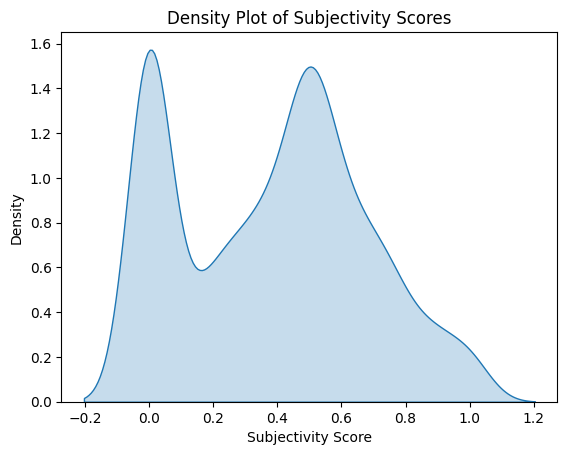

In [32]:
sns.kdeplot(subjectivity_scores, fill=True)
plt.xlabel('Subjectivity Score')
plt.ylabel('Density')
plt.title('Density Plot of Subjectivity Scores')
plt.show()

    The Density Plot suggests that the scores are skewed towards the lower end, with a large number of sentences having low subjectivity scores and fewer sentences with higher subjectivity scores. This means that the text may be more factual and less opinionated

#### Task 4: Descriptive Analysis

    Polarity Score: The polarity score indicates that the overall sentiment of the transcripts is slightly positive, as the score is greater than zero. However, the score is not very high, which suggests that there might be some mixed opinions and uncertainties about the company's future.
    
    Subjective Score: The subjective score indicates that the transcripts are more subjective than objective, as the score is greater than 0.5. However, the density plot does not follow a normal distribution, which suggests that there might be some extreme opinions expressed in the transcripts.
    
    Top frequent words: The most frequent words in the transcripts are "Think", "Officer", "Chief", "Like", "Year", and "Content". It is important to consider the context in which these words are used. For example, if "Think" is often used in the context of "I think the company is doing well", it might indicate positive sentiment, whereas if it is used in the context of "I don't think the company is doing well", it might indicate negative sentiment. Similarly, if "Officer" and "Chief" are often used in the context of positive news about the company's leadership, it might indicate positive sentiment.
    
    
    Overall, based on the given insights, it is difficult to make a clear and informed decision about buying the company's stock. The sentiment is slightly positive but not very high, and there might be some extreme opinions expressed in the transcripts. It is important to consider additional information, such as financial reports, market trends, and expert opinions, before making a decision.

______

______